# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | richards bay
Processing Record 2 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | pokhara
Processing Record 5 of Set 1 | flying fish cove
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | igarka
Processing Record 8 of Set 1 | happy valley-goose bay
Processing Record 9 of Set 1 | lethem
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | pavlodar
Processing Record 13 of Set 1 | bumba
Processing Record 14 of Set 1 | outokumpu
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | fort bragg
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | sirsa
Processing Record 21 of Set 1 | greymouth
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,richards bay,-28.7830,32.0377,18.30,76,100,5.85,ZA,1724867940
1,thompson,55.7435,-97.8558,19.09,52,40,5.14,CA,1724867942
2,pokhara,28.2333,83.9833,21.77,92,74,0.99,NP,1724867944
3,flying fish cove,-10.4217,105.6791,24.82,83,100,5.66,CX,1724867438
4,ilulissat,69.2167,-51.1000,6.01,65,75,3.09,GL,1724867653


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,18.30,76,100,5.85,ZA,1724867940
1,thompson,55.7435,-97.8558,19.09,52,40,5.14,CA,1724867942
2,pokhara,28.2333,83.9833,21.77,92,74,0.99,NP,1724867944
3,flying fish cove,-10.4217,105.6791,24.82,83,100,5.66,CX,1724867438
4,ilulissat,69.2167,-51.1000,6.01,65,75,3.09,GL,1724867653


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

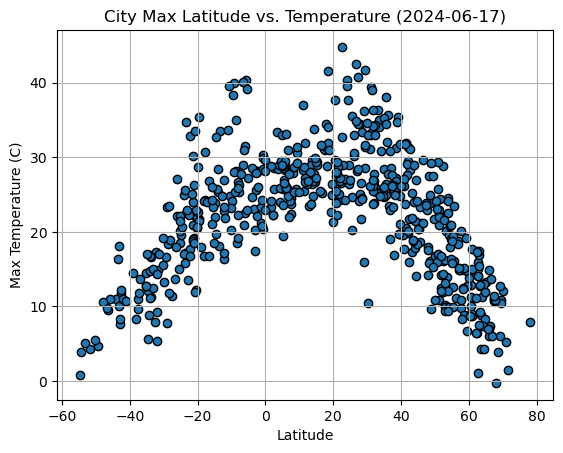

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolor = "black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

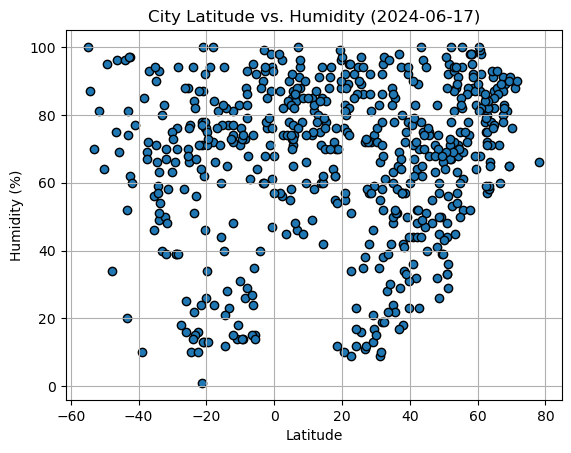

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

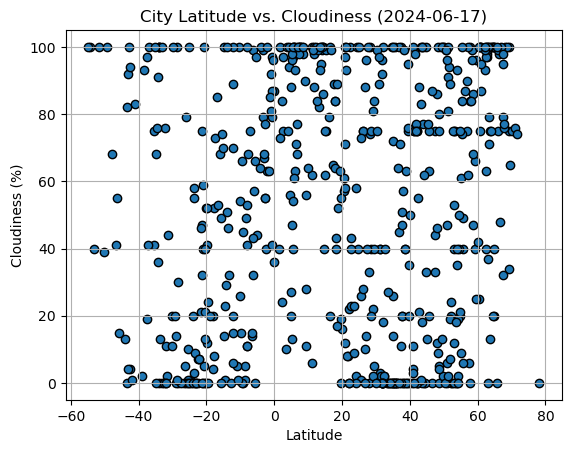

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

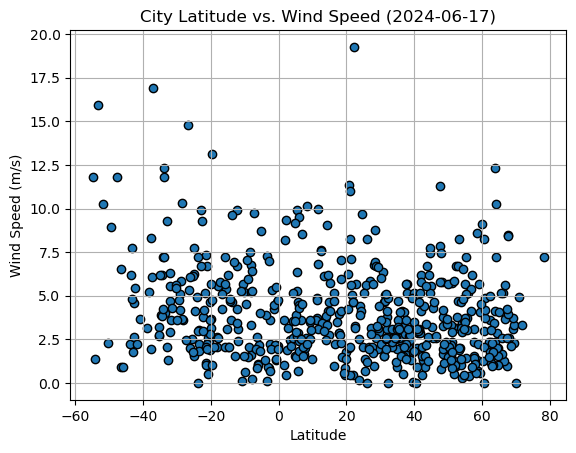

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=15, color='red')
    print(f"The r^2-value is {correlation[0]}")

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,19.09,52,40,5.14,CA,1724867942
2,pokhara,28.2333,83.9833,21.77,92,74,0.99,NP,1724867944
4,ilulissat,69.2167,-51.1000,6.01,65,75,3.09,GL,1724867653
5,igarka,67.4667,86.5833,11.02,91,79,0.98,RU,1724867947
6,happy valley-goose bay,53.3168,-60.3315,20.17,45,75,8.23,CA,1724867948


In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,richards bay,-28.7830,32.0377,18.30,76,100,5.85,ZA,1724867940
3,flying fish cove,-10.4217,105.6791,24.82,83,100,5.66,CX,1724867438
8,grytviken,-54.2811,-36.5092,3.90,87,100,1.39,GS,1724867951
13,puerto natales,-51.7236,-72.4875,4.25,81,100,10.29,CL,1724867957
17,blackmans bay,-43.0167,147.3167,7.63,81,92,1.79,AU,1724867962


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is -0.7091429733007848


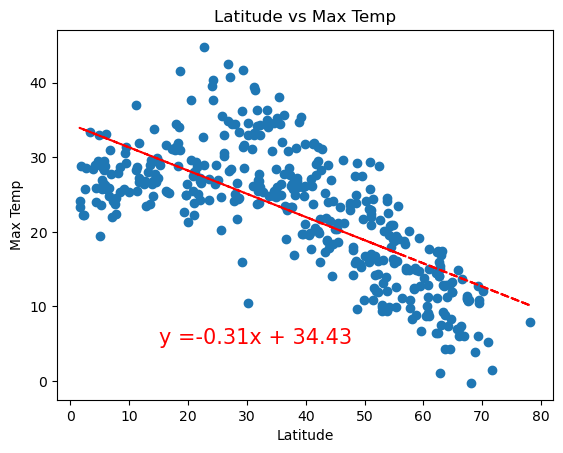

In [72]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(15, 5))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

plt.show()

The r^2-value is 0.7549624586621254


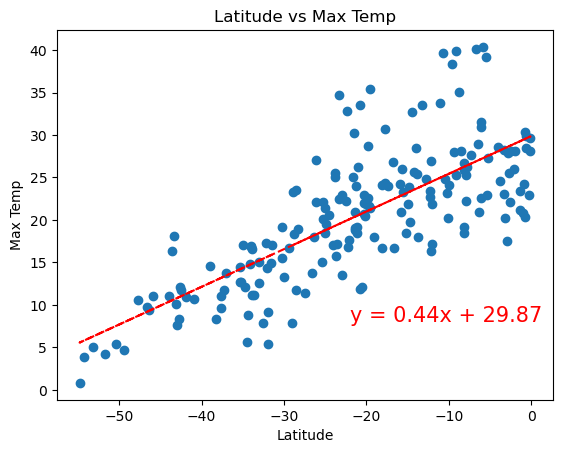

In [74]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-22, 8))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the r^2-value is -0.71, indicating that there is a negative relationship between latitude and maximum temperature. Meaning, in the Northern Hemisphere, the closer you get to 0 latitude (the equator), the warmer it will get on average. In the Southern Hemisphere it is the opposite, with an r^2-value of 0.75. This indicates that in the opposite way, as your latitude increases, the temperature increases. This makes sense, as in both hemispheres, the max temperature increases as the latitude reaches 0. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.06106711030352994


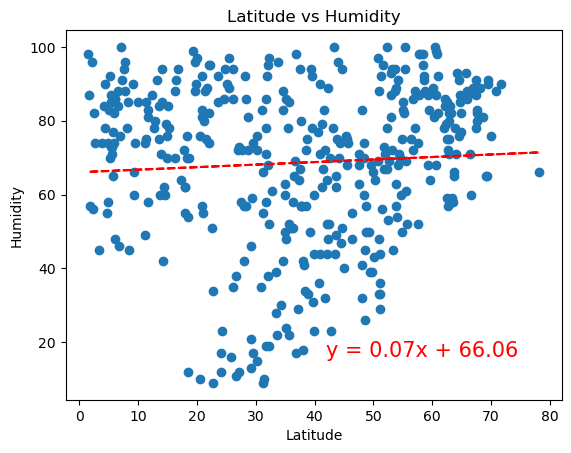

In [77]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(42, 16))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.show()

The r^2-value is -0.057449714756382025


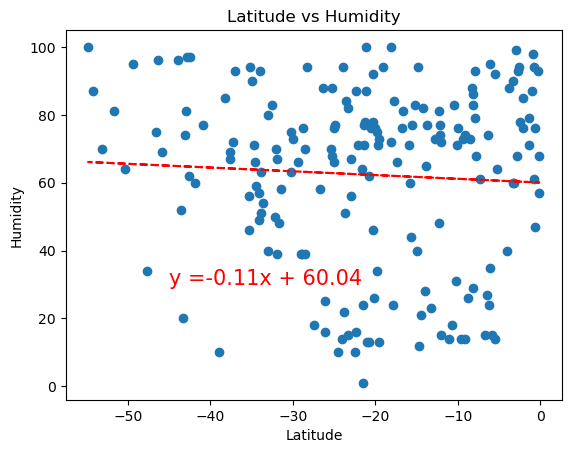

In [78]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],(-45, 30))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.show()


**Discussion about the linear relationship:** Based on the graphs, we can see that there is not a very strong correlation between latitude and humidity in either hemisphere, therefore solely changing your latitude in either the Northern or Southern Hemisphere will not directly cause a significant change in humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is -0.0435480747880491


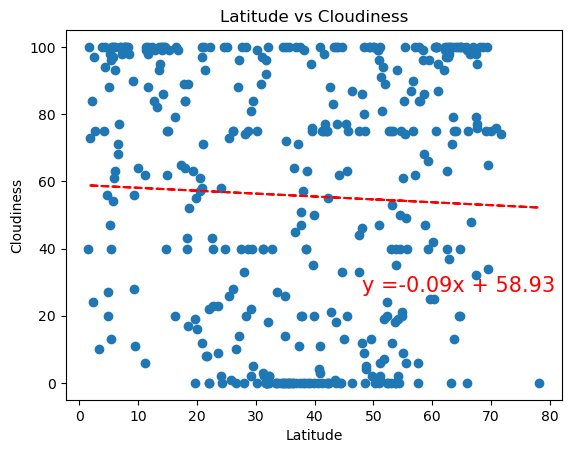

In [80]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],(48, 27))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.show()

The r^2-value is 0.05852990885783229


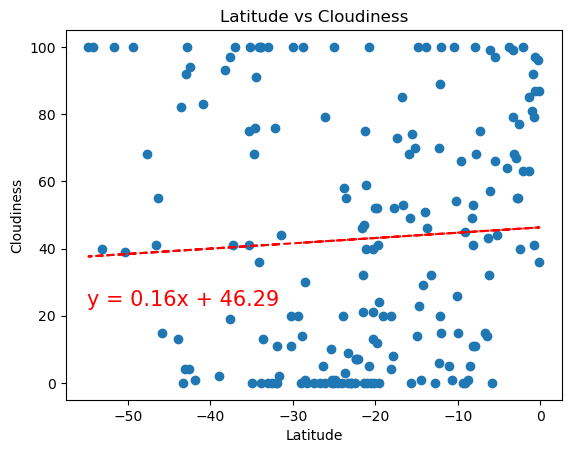

In [86]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],(-55, 23))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.show()

**Discussion about the linear relationship:** Based on the data, we can see that there are areas in both hemispheres of extreme aridity. In the northern hemisphere, cities with a latitude of 30-50 are more likely to have an extreme lack of clouds, whereas in the southern hemisphere, cities within the latitudes (-20)-(-30) are more predisposed to a lack of cloudiness. However, apart from certain latitudes having higher likelihoods, latitude in either hemisphere is not a guarantee of cloudiness or a lack thereof. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is -0.11605933789507916


Text(0.5, 1.0, 'Latitude vs Wind Speed')

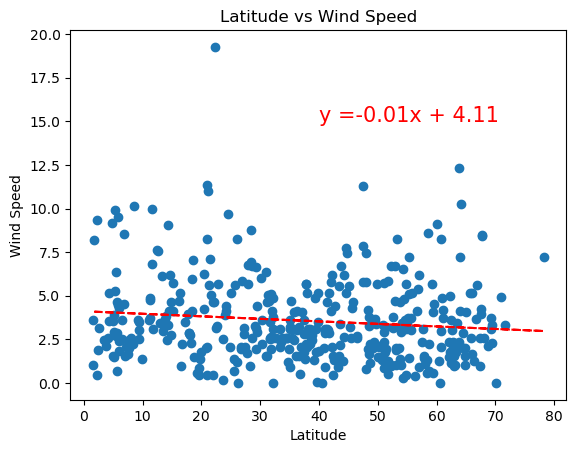

In [88]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],(40, 15))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

The r^2-value is -0.28451932871986346


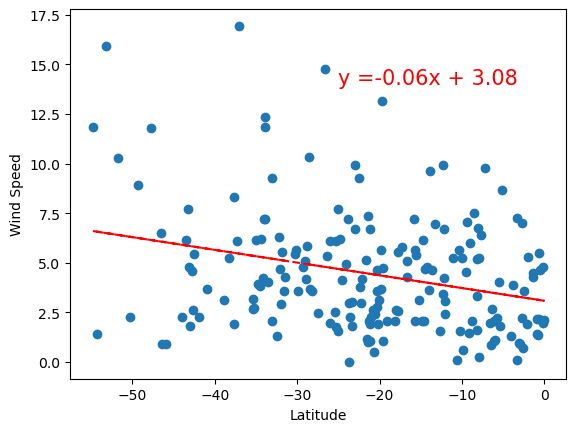

In [93]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],(-25, 14))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

**Discussion about the linear relationship:** Based on this data, we can see that in the northern hemisphere, wind speed on average is much lower than it is in the southern hemisphere. Despite neither hemisphere having a strong correlation between latitude and wind speed, it is clear to see that variability of wind speed is much higher in the southern hemisphere.